# Normalization

#### MinMaxScaler사용

Feature Importance 계산 결과 정규화가 되지 않아 타당하지 않은 값이 나와서 정규화 후 다시 해보려고 한다

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_excel('가중치분석.xlsx')
dfn=df.dropna(axis=0)
dfn.head(3)

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,드민 플라워 쉬폰롱원피스,418819.047619,-1.0,15,1279200.0,4941.0,2581200.0,793.280712,0.010929,0.860302,0,4.284968e+06
1,[La belle rose]레이니 찰랑 미니 훌원피스,297361.904762,884.0,15,840500.0,5121.0,3546200.0,477.172427,0.023238,0.935579,4,4.690564e+06
2,[La belle rose]로제 스퀘어 미니훌원피스,109923.809524,-124.0,15,754000.0,4171.0,1910400.0,496.187965,0.011508,0.875293,8,2.778891e+06


In [3]:
dfnc=dfn.copy()
dfnc.loc[:,'상품명'] = dfnc.loc[:,'상품명'].astype('category').cat.codes
dfnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   상품명            343 non-null    int16  
 1   일매출변동점수        343 non-null    float64
 2   조회수 변동 점수      343 non-null    float64
 3   등록일 점수         343 non-null    int64  
 4   이윤 점수          343 non-null    float64
 5   조회수 점수         343 non-null    float64
 6   장바구니 점수        343 non-null    float64
 7   판매율(구매전환율) 점수  343 non-null    float64
 8   욕망지표(구매의사)     343 non-null    float64
 9   긍정확률           343 non-null    float64
 10  주문결함 점수        343 non-null    int64  
 11  종합 점수          343 non-null    float64
dtypes: float64(9), int16(1), int64(2)
memory usage: 32.8 KB


In [4]:
scaler=MinMaxScaler()
dfnc[:]=scaler.fit_transform(dfnc[:])
dfnc.head(10)

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,0.263158,1.000000,0.248088,0.0,1.000000,0.964837,0.727878,0.043954,0.032787,0.828524,0.0,0.913543
1,0.055556,0.737593,1.000000,0.0,0.656171,1.000000,1.000000,0.022682,0.069713,0.926004,0.4,1.000000
2,0.070175,0.332634,0.143585,0.0,0.588377,0.814417,0.538718,0.023961,0.034524,0.847936,0.8,0.592506
3,0.043860,0.303066,0.507222,0.0,0.372690,0.533307,0.225312,0.022986,0.018668,0.857759,0.5,0.293801
4,0.049708,0.300905,0.214953,0.0,0.331544,0.472553,0.552704,0.022814,0.060719,0.742841,1.0,0.529738
5,0.026316,0.259753,0.195412,0.0,0.318298,0.142411,0.246743,0.096438,0.143639,0.948916,0.0,0.290662
6,0.929825,0.201070,0.113849,0.0,0.288830,0.285212,0.240088,0.037962,0.088235,0.657330,0.4,0.271777
7,0.160819,0.243251,0.212404,0.0,0.448870,0.210002,0.356043,0.049555,0.298050,0.785013,0.2,0.407097
8,0.423977,0.256255,0.214953,0.0,0.211396,0.107052,0.091365,0.083071,0.065455,0.885444,0.6,0.143715
9,0.008772,0.239588,0.203059,0.0,0.224014,0.127369,0.038069,0.068361,0.022936,0.673378,0.1,0.105187


### 이제 이 dfnc데이터를 이용하여 다시 Feature Importance 수행

## Case 1

In [5]:
!pip install lightgbm

In [6]:
!pip install shap

In [7]:
dfnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   상품명            343 non-null    float64
 1   일매출변동점수        343 non-null    float64
 2   조회수 변동 점수      343 non-null    float64
 3   등록일 점수         343 non-null    float64
 4   이윤 점수          343 non-null    float64
 5   조회수 점수         343 non-null    float64
 6   장바구니 점수        343 non-null    float64
 7   판매율(구매전환율) 점수  343 non-null    float64
 8   욕망지표(구매의사)     343 non-null    float64
 9   긍정확률           343 non-null    float64
 10  주문결함 점수        343 non-null    float64
 11  종합 점수          343 non-null    float64
dtypes: float64(12)
memory usage: 34.8 KB


In [8]:
X=dfnc.drop('종합 점수',axis=1)
y=dfnc['종합 점수']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 11), (69, 11), (274,), (69,))

In [41]:
X_train

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수
243,0.128655,0.088560,0.239592,0.0,0.007191,0.007814,0.018047,0.041843,0.142857,0.870464,0.0
22,0.415205,0.159342,0.254036,0.0,0.102690,0.053135,0.027071,0.090776,0.043796,0.937327,0.2
196,0.289474,0.092726,0.241291,0.0,0.009033,0.038093,0.019880,0.006625,0.045685,0.770008,0.0
139,0.885965,0.109403,0.248088,0.0,0.023454,0.019730,0.027917,0.042316,0.145631,0.847190,0.0
66,0.201754,0.119218,0.233645,0.0,0.048377,0.047861,0.060910,0.039611,0.145749,0.894487,0.0
...,...,...,...,...,...,...,...,...,...,...,...
338,0.690058,0.087942,0.252336,0.0,0.002998,0.005470,0.007896,0.021975,0.200000,0.965247,0.0
200,0.461988,0.113827,0.243840,0.0,0.009581,0.004884,0.025605,0.103726,0.444444,0.951541,0.1
120,0.011696,0.124311,0.252336,0.0,0.024179,0.009572,0.044414,0.115264,0.294118,0.893767,0.0
47,0.692982,0.128889,0.243840,0.0,0.057507,0.025786,0.073995,0.105876,0.179104,0.629406,0.2


In [38]:
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = X_train, label = y_train) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, #10
            'learning_rate': 0.1, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(X_test) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, y_test)))) # RMSE

Found `n_estimators` in params. Will use it instead of argument


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 274, number of used features: 10
[LightGBM] [Info] Start training from score 0.050626
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [39]:
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test)

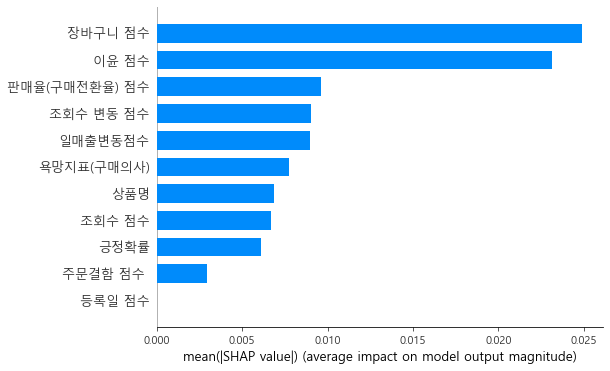

In [40]:
from matplotlib import font_manager,rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
shap.summary_plot(shap_values, X_test, plot_type = "bar")

## Case 2

In [42]:
!pip install mglearn

In [43]:
dfnc.head()

,상품명,일매출변동점수,조회수 변동 점수,등록일 점수,이윤 점수,조회수 점수,장바구니 점수,판매율(구매전환율) 점수,욕망지표(구매의사),긍정확률,주문결함 점수,종합 점수
0,0.263158,1.000000,0.248088,0.0,1.000000,0.964837,0.727878,0.043954,0.032787,0.828524,0.0,0.913543
1,0.055556,0.737593,1.000000,0.0,0.656171,1.000000,1.000000,0.022682,0.069713,0.926004,0.4,1.000000
2,0.070175,0.332634,0.143585,0.0,0.588377,0.814417,0.538718,0.023961,0.034524,0.847936,0.8,0.592506
3,0.043860,0.303066,0.507222,0.0,0.372690,0.533307,0.225312,0.022986,0.018668,0.857759,0.5,0.293801
4,0.049708,0.300905,0.214953,0.0,0.331544,0.472553,0.552704,0.022814,0.060719,0.742841,1.0,0.529738


In [44]:
dfnc['종합 점수']

0      0.913543
1      1.000000
2      0.592506
3      0.293801
4      0.529738
         ...   
356    0.003530
357    0.001859
358    0.008918
361    0.002654
362    0.003277
Name: 종합 점수, Length: 343, dtype: float64

In [45]:
def scoring(x):
    if x<=0.2:
        return 0
    elif x<=0.4:
        return 1
    elif x<=0.6:
        return 2
    elif x<=0.8:
        return 3
    else:
        return 4

In [46]:
dfnc['종합 점수']=dfnc['종합 점수'].apply(scoring)

In [47]:
dfnc['종합 점수']

0      4
1      4
2      2
3      1
4      2
      ..
356    0
357    0
358    0
361    0
362    0
Name: 종합 점수, Length: 343, dtype: int64

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np


# 훈련/테스트 세트로 나누기'
feature=['종합 점수']
X=dfnc.drop(feature,axis=1)
y=np.asarray(dfnc['종합 점수'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
forest = RandomForestClassifier(n_estimators=100)

In [49]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
forest.feature_importances_

array([0.01548271, 0.15878055, 0.05558218, 0.        , 0.17383003,
       0.12108588, 0.33383443, 0.01510002, 0.03228316, 0.04572669,
       0.04829434])

<BarContainer object of 11 artists>

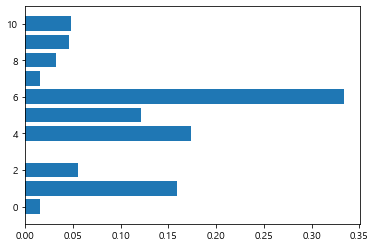

In [51]:
plt.barh(range(11), forest.feature_importances_, align='center')

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.971
특성 중요도 : 
[0.01548271 0.15878055 0.05558218 0.         0.17383003 0.12108588
 0.33383443 0.01510002 0.03228316 0.04572669 0.04829434]


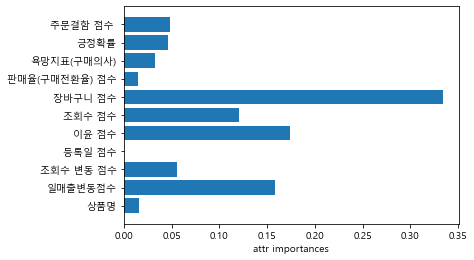

In [52]:

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))
# 특성 중요도 시각화 하기
def plot_feature_importances_cancer(model):
    n_features = 11
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),dfnc.columns[:11])
    plt.xlabel("attr importances")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_cancer(forest)

## Case 3

In [53]:
!pip install xgboost

In [54]:
import xgboost

print(xgboost.__version__)

1.3.3


In [55]:
dfnc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 362
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   상품명            343 non-null    float64
 1   일매출변동점수        343 non-null    float64
 2   조회수 변동 점수      343 non-null    float64
 3   등록일 점수         343 non-null    float64
 4   이윤 점수          343 non-null    float64
 5   조회수 점수         343 non-null    float64
 6   장바구니 점수        343 non-null    float64
 7   판매율(구매전환율) 점수  343 non-null    float64
 8   욕망지표(구매의사)     343 non-null    float64
 9   긍정확률           343 non-null    float64
 10  주문결함 점수        343 non-null    float64
 11  종합 점수          343 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 34.8 KB


In [56]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [58]:
def scoring(x):
    if x<=0.2:
        return 0
    elif x<=0.4:
        return 1
    elif x<=0.6:
        return 2
    elif x<=0.8:
        return 3
    else:
        return 4
    
dfnc['종합 점수']=dfnc['종합 점수'].apply(scoring)

In [59]:
X=dfnc.drop('종합 점수',axis=1)
y=dfnc['종합 점수']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [110]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'multi:softmax',
           'eval_metric':'mlogloss',
            'num_class' : 5
        }
num_rounds = 400

In [111]:
wlist = [(dtrain,'train'),(dtest,'eval') ]

In [112]:
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

[0]	train-mlogloss:1.37366	eval-mlogloss:1.37659
[1]	train-mlogloss:1.19133	eval-mlogloss:1.19531
[2]	train-mlogloss:1.04371	eval-mlogloss:1.04863
[3]	train-mlogloss:0.92078	eval-mlogloss:0.92624
[4]	train-mlogloss:0.81652	eval-mlogloss:0.82254
[5]	train-mlogloss:0.72691	eval-mlogloss:0.73371
[6]	train-mlogloss:0.64913	eval-mlogloss:0.65630
[7]	train-mlogloss:0.58110	eval-mlogloss:0.58936
[8]	train-mlogloss:0.52128	eval-mlogloss:0.52991
[9]	train-mlogloss:0.46842	eval-mlogloss:0.47798
[10]	train-mlogloss:0.42154	eval-mlogloss:0.43146
[11]	train-mlogloss:0.37984	eval-mlogloss:0.39058
[12]	train-mlogloss:0.34265	eval-mlogloss:0.35372
[13]	train-mlogloss:0.30942	eval-mlogloss:0.32121
[14]	train-mlogloss:0.27968	eval-mlogloss:0.29176
[15]	train-mlogloss:0.25300	eval-mlogloss:0.26576
[16]	train-mlogloss:0.22906	eval-mlogloss:0.24208
[17]	train-mlogloss:0.20753	eval-mlogloss:0.22113
[18]	train-mlogloss:0.18817	eval-mlogloss:0.20231
[19]	train-mlogloss:0.17073	eval-mlogloss:0.18510
[20]	train

[163]	train-mlogloss:0.00336	eval-mlogloss:0.01172
[164]	train-mlogloss:0.00335	eval-mlogloss:0.01171
[165]	train-mlogloss:0.00334	eval-mlogloss:0.01170
[166]	train-mlogloss:0.00333	eval-mlogloss:0.01169
[167]	train-mlogloss:0.00332	eval-mlogloss:0.01168
[168]	train-mlogloss:0.00332	eval-mlogloss:0.01167
[169]	train-mlogloss:0.00331	eval-mlogloss:0.01166
[170]	train-mlogloss:0.00330	eval-mlogloss:0.01165
[171]	train-mlogloss:0.00329	eval-mlogloss:0.01165
[172]	train-mlogloss:0.00329	eval-mlogloss:0.01164
[173]	train-mlogloss:0.00328	eval-mlogloss:0.01163
[174]	train-mlogloss:0.00327	eval-mlogloss:0.01162
[175]	train-mlogloss:0.00327	eval-mlogloss:0.01161
[176]	train-mlogloss:0.00326	eval-mlogloss:0.01160
[177]	train-mlogloss:0.00325	eval-mlogloss:0.01159
[178]	train-mlogloss:0.00325	eval-mlogloss:0.01158
[179]	train-mlogloss:0.00324	eval-mlogloss:0.01157
[180]	train-mlogloss:0.00323	eval-mlogloss:0.01156
[181]	train-mlogloss:0.00323	eval-mlogloss:0.01155
[182]	train-mlogloss:0.00322	ev

[324]	train-mlogloss:0.00271	eval-mlogloss:0.01081
[325]	train-mlogloss:0.00271	eval-mlogloss:0.01081
[326]	train-mlogloss:0.00271	eval-mlogloss:0.01081
[327]	train-mlogloss:0.00271	eval-mlogloss:0.01081
[328]	train-mlogloss:0.00270	eval-mlogloss:0.01080
[329]	train-mlogloss:0.00270	eval-mlogloss:0.01080
[330]	train-mlogloss:0.00270	eval-mlogloss:0.01080
[331]	train-mlogloss:0.00270	eval-mlogloss:0.01079
[332]	train-mlogloss:0.00270	eval-mlogloss:0.01079
[333]	train-mlogloss:0.00270	eval-mlogloss:0.01079
[334]	train-mlogloss:0.00269	eval-mlogloss:0.01079
[335]	train-mlogloss:0.00269	eval-mlogloss:0.01078
[336]	train-mlogloss:0.00269	eval-mlogloss:0.01078
[337]	train-mlogloss:0.00269	eval-mlogloss:0.01078
[338]	train-mlogloss:0.00269	eval-mlogloss:0.01077
[339]	train-mlogloss:0.00268	eval-mlogloss:0.01077
[340]	train-mlogloss:0.00268	eval-mlogloss:0.01077
[341]	train-mlogloss:0.00268	eval-mlogloss:0.01077
[342]	train-mlogloss:0.00268	eval-mlogloss:0.01077
[343]	train-mlogloss:0.00268	ev

In [113]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

[0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
예측값 10개만 표시: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred,average='micro')
    recall = recall_score(y_test , pred,average='micro')
    f1 = f1_score(y_test,pred,average='micro')
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [119]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[66  0  0]
 [ 0  0  0]
 [ 0  3  0]]
정확도: 0.9565, 정밀도: 0.9565, 재현율: 0.9565,    F1: 0.9565, AUC:1.0000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

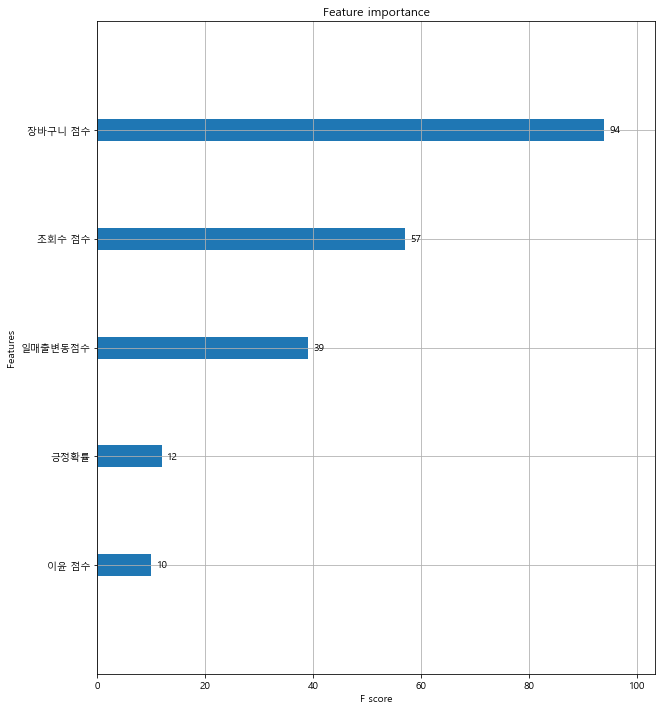

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)